# Modeling of Human Activity Regcognition (HAR) through Computer Vision with AI

In this notebook, we will train a model to recognize 6 different classes of human activities using Artificial Intelligence with Machine Learning, Deep Learning, Computer Vision, and related theories. On our expectation, we need to get the model to a validation accuracy of `90%` in order to pass the assessment

## Objectives

* Prepare image data for training
* Create and compile a model for image classification
* Train an image classification model and observe the results

## The Dataset

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset), The dataset structure is in the `dataset` folder. There are 6 categories of human activities: cycling, drinking, eating, fighting, running, and sleeping.

## Load ImageNet Base Model

We decide to start with a model pre-trained on ImageNet. Load the model with the correct weights, set an input shape, and choose to remove the last layers of the model.

In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

## Freeze Base Model

Next, we suggest freezing the base model. This is done so that all the learning from the ImageNet dataset does not get destroyed in the initial training.

In [2]:
# Freeze base model
base_model.trainable = False

## Add Layers to Model

Now it's time to add layers to the pretrained model.

In [3]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final 6 denses layer
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

### Summarizing the Model

Run the cell below to summarize the model:

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


## Compile Model

Next, we will compile our model using loss option calls [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model in metrics option:

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

## Augment the Data

Augment the data to improve the dataset.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
)

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

## Load Dataset

Now it's time to load the train and validation datasets. Pick the right folders, as well as the right `target_size` of the images (it needs to match the height and width input of the model you've created).

In [7]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "dataset/train/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "dataset/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
)

Found 4080 images belonging to 6 classes.
Found 960 images belonging to 6 classes.


### Summarizing the Training and Validation Data

In [8]:
print("Number of data:", len(train_it))
print("Class indices: ", train_it.class_indices)

Number of data: 128
Class indices:  {'cycling': 0, 'drinking': 1, 'eating': 2, 'fighting': 3, 'running': 4, 'sleeping': 5}


## Train the Model

Time to train the model! Pass the `train` and `valid` iterators into the `fit` function, as well as setting the desired number of epochs.

In [9]:
EPOCHS = 30

In [10]:
history = model.fit(train_it,
                    validation_data=valid_it,
                    steps_per_epoch=train_it.samples/train_it.batch_size,
                    validation_steps=valid_it.samples/valid_it.batch_size,
                    epochs=EPOCHS)

Epoch 1/30
128/127 [==============================] - 52s 403ms/step - loss: 1.7699 - accuracy: 0.5912 - val_loss: 1.0075 - val_accuracy: 0.7740
Epoch 2/30
128/127 [==============================] - 45s 355ms/step - loss: 0.8742 - accuracy: 0.7583 - val_loss: 0.7424 - val_accuracy: 0.8073
Epoch 3/30
128/127 [==============================] - 46s 356ms/step - loss: 0.6120 - accuracy: 0.8174 - val_loss: 0.6068 - val_accuracy: 0.8292
Epoch 4/30
128/127 [==============================] - 46s 359ms/step - loss: 0.5315 - accuracy: 0.8348 - val_loss: 0.6524 - val_accuracy: 0.8271
Epoch 5/30
128/127 [==============================] - 45s 354ms/step - loss: 0.4640 - accuracy: 0.8532 - val_loss: 0.6446 - val_accuracy: 0.8302
Epoch 6/30
128/127 [==============================] - 45s 353ms/step - loss: 0.3961 - accuracy: 0.8711 - val_loss: 0.5787 - val_accuracy: 0.8458
Epoch 7/30
128/127 [==============================] - 46s 356ms/step - loss: 0.3655 - accuracy: 0.8775 - val_loss: 0.5418 - val_ac

### Visualizing the Training History

We will use the matplotlib library to visualize the training history in graphical format.

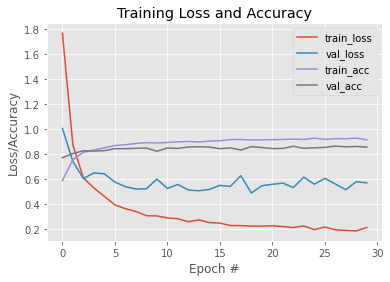

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.show()

## Unfreeze Model for Fine Tuning

Fine tuning the model with a very low learning rate.

In [12]:
INIT_LR = .00001
EPOCHS = 10

In [13]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),
              loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
history = model.fit(train_it,
                    validation_data=valid_it,
                    steps_per_epoch=train_it.samples/train_it.batch_size,
                    validation_steps=valid_it.samples/valid_it.batch_size,
                    epochs=EPOCHS)

Epoch 1/10
128/127 [==============================] - 72s 566ms/step - loss: 0.2851 - accuracy: 0.9044 - val_loss: 0.4595 - val_accuracy: 0.8677
Epoch 2/10
128/127 [==============================] - 62s 484ms/step - loss: 0.1759 - accuracy: 0.9336 - val_loss: 0.4899 - val_accuracy: 0.8615
Epoch 3/10
128/127 [==============================] - 61s 476ms/step - loss: 0.1302 - accuracy: 0.9549 - val_loss: 0.4579 - val_accuracy: 0.8896
Epoch 4/10
128/127 [==============================] - 61s 474ms/step - loss: 0.1107 - accuracy: 0.9620 - val_loss: 0.4895 - val_accuracy: 0.8729
Epoch 5/10
128/127 [==============================] - 61s 477ms/step - loss: 0.0819 - accuracy: 0.9699 - val_loss: 0.4361 - val_accuracy: 0.8969
Epoch 6/10
128/127 [==============================] - 61s 475ms/step - loss: 0.0677 - accuracy: 0.9782 - val_loss: 0.5242 - val_accuracy: 0.8927
Epoch 7/10
128/127 [==============================] - 60s 472ms/step - loss: 0.0618 - accuracy: 0.9779 - val_loss: 0.4230 - val_ac

## Evaluate the Model

Evaluate th model by executing the following cells. The evaluate function will return a tuple, where the first value is model loss, and the second value is model accuracy. So, we expect to have an accuracy value of `90% or higher`.

In [15]:
model.evaluate(valid_it, steps=valid_it.samples/valid_it.batch_size)

30/30 [==============================] - 5s 152ms/step - loss: 0.6322 - accuracy: 0.8854


[0.6322140097618103, 0.8854166865348816]

## Saving the Model

Saving the model for the future use.

In [16]:
from datetime import datetime

now = datetime.now()
filename = now.strftime("%y%m%d") + "_har6.h5"
model.save(filename)